# Variable Star Classification Using Machine Learning
##### AST4930 - Machine Learning and Astronomy, Fall 2023
##### Kevin Daniel, Brooke Vinson

## 1. Data Preprocessing

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Import the data
filename = "variable_star_data.csv"
raw = pd.read_csv(filename)

raw.head(5) # Print a preview of the data

,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,classification
0,1635721458409799680,Gaia DR2 45270673287508864,45270673287508864,195306191,2015.5,61.904588,0.051574,15.730237,0.031844,2.240627,...,200111.0,3.155126,2.935605,3.278884,2.454926,2.368272,2.54158,https://gea.esac.esa.int/data-server/datalink/...,http://gea.esac.esa.int/data-server/data?RETRI...,DCEP
1,1635721458409799680,Gaia DR2 47299585774090112,47299585774090112,1286087048,2015.5,65.007484,0.092569,17.279392,0.050904,-0.036374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,http://gea.esac.esa.int/data-server/data?RETRI...,DCEP
2,1635721458409799680,Gaia DR2 61259706956316800,61259706956316800,472315913,2015.5,51.017925,0.058155,21.229116,0.041259,-0.048516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,http://gea.esac.esa.int/data-server/data?RETRI...,DCEP
3,1635721458409799680,Gaia DR2 69969728833405184,69969728833405184,1544186457,2015.5,56.648234,0.077262,25.606606,0.037741,0.015177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,http://gea.esac.esa.int/data-server/data?RETRI...,DCEP
4,1635721458409799680,Gaia DR2 99384413653590400,99384413653590400,1003467814,2015.5,32.786329,0.021948,20.449930,0.016696,0.234115,...,200111.0,7.474038,7.104698,8.462600,54.054447,40.576775,67.53212,https://gea.esac.esa.int/data-server/datalink/...,http://gea.esac.esa.int/data-server/data?RETRI...,DCEP


In [31]:
# Remove obviously irrelevant columns (id, urls, etc.)
df = raw.drop(columns=['solution_id', 'DESIGNATION', 'source_id', 'random_index', 'ref_epoch', 'datalink_url', 'epoch_photometry_url', 'phot_variable_flag'])
df = df.fillna(0) # Replace all NaN values with 0's

# Convert string labels into numeric labels
df['classification'].replace({'ACEP': 0, 'T2CEP': 0, 'CEP': 0, 'DCEP': 0}, inplace=True) # Cepheid
df['classification'].replace({'ARRD': 1, 'RRC': 1, 'RRAB': 1, 'RRD': 1}, inplace=True) # RR Lyrae
df['classification'].replace({'MIRA_SR': 2}, inplace=True) # Long-Period

df.head(5)

,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,...,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,classification
0,61.904588,0.051574,15.730237,0.031844,2.240627,0.054008,41.486847,-17.394505,0.113385,5.411426,...,1.1109,1.5871,200111.0,3.155126,2.935605,3.278884,2.454926,2.368272,2.54158,0
1,65.007484,0.092569,17.279392,0.050904,-0.036374,0.106889,-0.340297,0.397146,0.177609,-1.382525,...,0.0000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
2,51.017925,0.058155,21.229116,0.041259,-0.048516,0.062976,-0.770391,0.029742,0.129688,-1.288813,...,0.0000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
3,56.648234,0.077262,25.606606,0.037741,0.015177,0.100026,0.151731,7.369642,0.179768,-4.240757,...,0.0000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
4,32.786329,0.021948,20.449930,0.016696,0.234115,0.022104,10.591663,15.064335,0.044752,-2.781571,...,0.0000,0.0000,200111.0,7.474038,7.104698,8.462600,54.054447,40.576775,67.53212,0


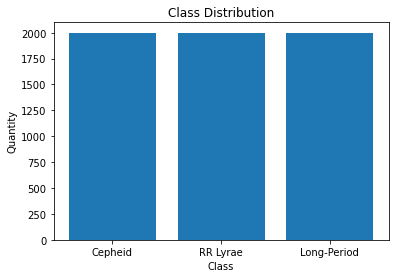

In [74]:
# Split into X and y data
y = df[['classification']]
X = df.drop(columns=['classification'])

# Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Scale the data (to be used for models where feature scaling is necessary)
X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = StandardScaler().fit(X_train).transform(X_test)

# Convert the vertical y values into a flat array
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Plot the class distribution
plt.bar(np.arange(3), [len(y[y.classification == 0]), len(y[y.classification == 1]), len(y[y.classification == 2])], align='center')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Quantity')
plt.xticks(np.arange(3), ['Cepheid', 'RR Lyrae', 'Long-Period'])
plt.savefig('class_distribution.png', transparent=False, dpi=300)

## 2. Model Evaluation Function

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Function to print metrics and confusion matrix
def evaluate_model(grid_search_, x_actual, y_actual, time_, title):
    # Print best paramters, model, score, and training time
    print("Best parameters: {}".format(grid_search_.best_params_))
    print("Best model: {}".format(grid_search_.best_estimator_))
    print("Test score: {:.2f}".format(grid_search_.score(x_actual, y_actual)))
    print("Total training time: {:.0f}".format(time_) + ' seconds.\n')
    
    prediction = grid_search_.best_estimator_.predict(x_actual) # Get y predict values
    
    print(classification_report(y_actual, prediction)) # Print classification report (accuracy, precision, recall, f1-scores)
    
    # Output confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix(y_actual, prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{title} Confusion Matrix")

## 3. Decision Tree

#### a) Train using initial cleaned dataset of 88 features

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree
import time

# Hyperparameter optimization and training
param_grid = {'max_depth': np.arange(30)+1,
              'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, 
                           return_train_score=True, verbose=3)
tstart = time.time() 
grid_search.fit(X_train, y_train)
total_time = time.time() - tstart

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END criterion=gini, max_depth=1;, score=(train=0.656, test=0.659) total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1;, score=(train=0.657, test=0.656) total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1;, score=(train=0.657, test=0.658) total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1;, score=(train=0.661, test=0.658) total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1;, score=(train=0.657, test=0.652) total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2;, score=(train=0.863, test=0.879) total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2;, score=(train=0.864, test=0.859) total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2;, score=(train=0.869, test=0.850) total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2;, score=(train=0.871, test=0.860) total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2;, score=(train=0.869, test=0.834) total time=   0.1

Best parameters: {'criterion': 'gini', 'max_depth': 17}
Best model: DecisionTreeClassifier(max_depth=17, random_state=0)
Test score: 0.95
Total training time: 74 seconds.

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       494
           1       0.92      0.94      0.93       491
           2       0.99      0.99      0.99       515

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500



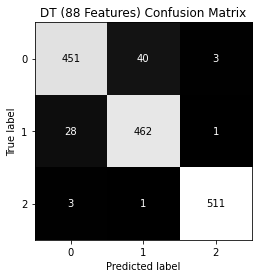

In [38]:
evaluate_model(grid_search, X_test, y_test, total_time, 'DT (88 Features)') # Output model evaluation and metrics

#### b) Feature Importances

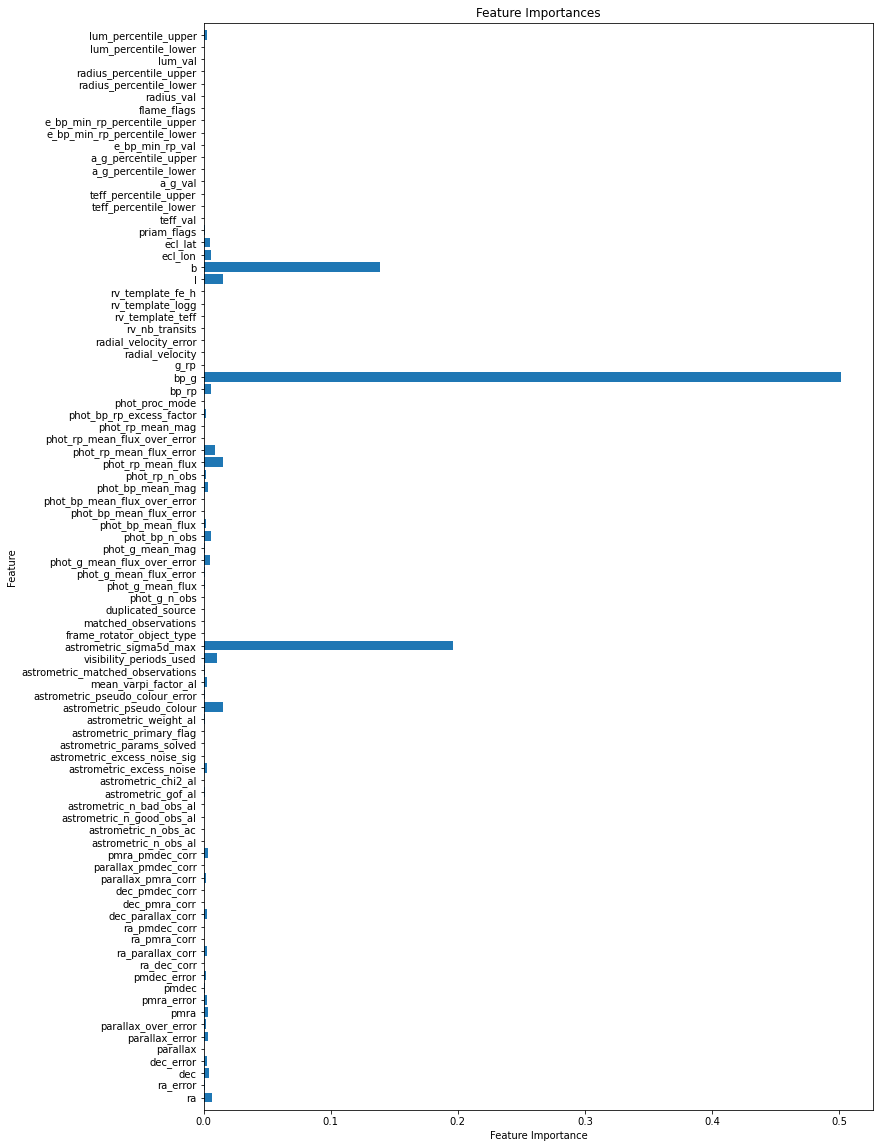

In [39]:
feature_names = list(X.columns.values) # Get all the feature names

# Plot feature importances of the decision tree model
fig, ax = plt.subplots(figsize=(12, 20))
n_features = len(feature_names)
plt.barh(np.arange(n_features), grid_search.best_estimator_.feature_importances_, align='center')
plt.yticks(np.arange(n_features), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.title("Feature Importances")
plt.savefig('feature_importances.png', transparent=False, dpi=300)

##### i. Create a reduced dataset by removing features with zero importance

In [40]:
# Algorithm to remove any feature in the dataset that has a feature importance of 0
feature_importances = grid_search.best_estimator_.feature_importances_
features_to_remove = []

# Loop through all the features and find features with 0 importances
# Add names of these features to a list
for i in range(len(feature_importances)):
    if feature_importances[i] == 0:
        features_to_remove.append(feature_names[i])

print('Removed the following features from the dataset:')
print(', '.join(features_to_remove))

# Use the list to delete the columns from the data set
X_reduced = X.drop(columns=features_to_remove)

# Split the data into training and test
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X, y, random_state=0)

# Scale the data (to be used for models where feature scaling is necessary)
X_reduced_train_scaled = StandardScaler().fit(X_reduced_train).transform(X_reduced_train)
X_reduced_test_scaled = StandardScaler().fit(X_reduced_train).transform(X_reduced_test)

y_reduced_train = np.ravel(y_reduced_train)
y_reduced_test = np.ravel(y_reduced_test)

X_reduced.head(5) # Preview of the reduced training dataset

Removed the following features from the dataset:
parallax, ra_dec_corr, ra_pmra_corr, dec_pmra_corr, dec_pmdec_corr, parallax_pmdec_corr, astrometric_n_obs_al, astrometric_n_obs_ac, astrometric_n_good_obs_al, astrometric_n_bad_obs_al, astrometric_params_solved, astrometric_primary_flag, frame_rotator_object_type, phot_g_n_obs, phot_bp_mean_flux_error, phot_rp_mean_flux_over_error, phot_rp_mean_mag, phot_proc_mode, g_rp, radial_velocity, radial_velocity_error, rv_nb_transits, rv_template_teff, rv_template_logg, rv_template_fe_h, teff_val, teff_percentile_lower, a_g_val, a_g_percentile_lower, a_g_percentile_upper, e_bp_min_rp_val, e_bp_min_rp_percentile_lower, e_bp_min_rp_percentile_upper, flame_flags, radius_val, radius_percentile_lower, radius_percentile_upper, lum_val, lum_percentile_lower


,ra,ra_error,dec,dec_error,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,...,phot_bp_rp_excess_factor,bp_rp,bp_g,l,b,ecl_lon,ecl_lat,priam_flags,teff_percentile_upper,lum_percentile_upper
0,61.904588,0.051574,15.730237,0.031844,0.054008,41.486847,-17.394505,0.113385,5.411426,0.086960,...,1.312013,1.746319,0.846476,176.889797,-25.969161,62.927936,-5.107568,100001.0,4216.8400,2.54158
1,65.007484,0.092569,17.279392,0.050904,0.106889,-0.340297,0.397146,0.177609,-1.382525,0.126873,...,1.385218,1.617953,0.693527,177.748815,-22.707627,66.141870,-4.113805,110001.0,4543.2500,0.00000
2,51.017925,0.058155,21.229116,0.041259,0.062976,-0.770391,0.029742,0.129688,-1.288813,0.098117,...,1.323303,1.398599,0.589706,164.191721,-29.156887,54.058703,2.521400,110001.0,4906.0000,0.00000
3,56.648234,0.077262,25.606606,0.037741,0.100026,0.151731,7.369642,0.179768,-4.240757,0.086318,...,1.240184,0.854838,0.322655,165.412170,-22.476524,60.124062,5.560297,100001.0,5748.2500,0.00000
4,32.786329,0.021948,20.449930,0.016696,0.022104,10.591663,15.064335,0.044752,-2.781571,0.034907,...,1.220517,0.841805,0.332721,147.070179,-38.657001,37.502657,6.819012,100001.0,5871.6665,67.53212


##### ii. Create a dataset with the 3 most important features

In [41]:
# Since there are 3 features with significant feature importances,
# we will create a training set with these 3 features
# Split into X and y data
y_important = df[['classification']]
X_important = df[['bp_g', 'b', 'astrometric_sigma5d_max']]#, 'l', 'phot_rp_mean_flux', 'astrometric_pseudo_colour']]

# Split the data into training and test
X_important_train, X_important_test, y_important_train, y_important_test = train_test_split(X_important, y_important, random_state=0)

# Scale the data (to be used for models where feature scaling is necessary
X_important_train_scaled = StandardScaler().fit(X_important_train).transform(X_important_train)
X_important_test_scaled = StandardScaler().fit(X_important_train).transform(X_important_test)

# Convert the vertical y values into a flat array
y_important_train = np.ravel(y_important_train)
y_important_test = np.ravel(y_important_test)

X_important_train.head(5) # Preview of training data with 3 most important features

,bp_g,b,astrometric_sigma5d_max
1824,0.838984,4.784906,0.134961
253,0.422644,-4.028870,0.038853
1114,0.436855,-32.394311,0.211030
3220,0.270435,-7.004056,14.029797
2108,0.261042,5.390260,0.748036


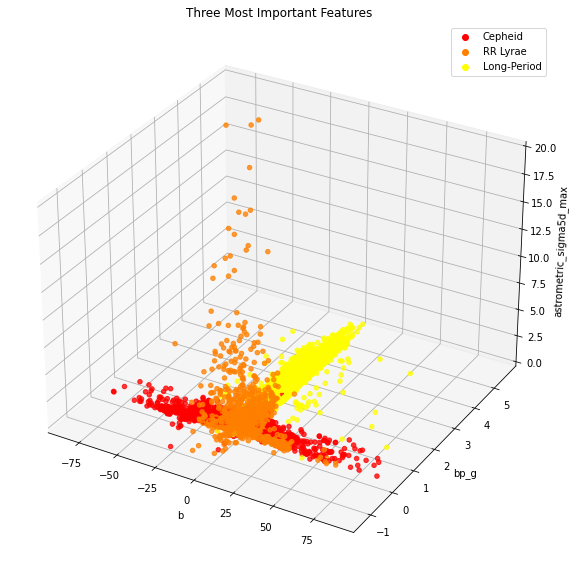

In [42]:
# Plot the three features in a three dimensional plot
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_zlim(0, 20)
ax.set_xlabel('b')
ax.set_ylabel('bp_g')
ax.set_zlabel('astrometric_sigma5d_max')
ax.set_title('Three Most Important Features')

plot_3d = ax.scatter3D(X_important['b'], X_important['bp_g'], X_important['astrometric_sigma5d_max'], c=y_important, cmap='autumn');
legend = plt.legend(*plot_3d.legend_elements())
legend.get_texts()[0].set_text('Cepheid')
legend.get_texts()[1].set_text('RR Lyrae')
legend.get_texts()[2].set_text('Long-Period')
plt.savefig('3d_feature_plot.png', transparent=False, dpi=300)

#### c) Retrain decision tree model on reduced dataset of now 49 features

In [43]:
# Hyperparameter optimization and training
param_grid = {'max_depth': np.arange(30)+1,
              'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, 
                           return_train_score=True, verbose=3)
tstart = time.time() 
grid_search.fit(X_reduced_train, y_reduced_train)
total_time = time.time() - tstart

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END criterion=gini, max_depth=1;, score=(train=0.656, test=0.659) total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1;, score=(train=0.657, test=0.656) total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1;, score=(train=0.657, test=0.658) total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1;, score=(train=0.661, test=0.658) total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1;, score=(train=0.657, test=0.652) total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2;, score=(train=0.863, test=0.879) total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2;, score=(train=0.864, test=0.859) total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2;, score=(train=0.869, test=0.850) total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2;, score=(train=0.871, test=0.860) total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2;, score=(train=0.869, test=0.834) total time=   0.1

Best parameters: {'criterion': 'gini', 'max_depth': 17}
Best model: DecisionTreeClassifier(max_depth=17, random_state=0)
Test score: 0.95
Total training time: 74 seconds.

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       494
           1       0.92      0.94      0.93       491
           2       0.99      0.99      0.99       515

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500



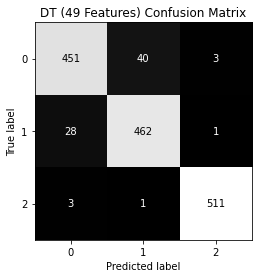

In [44]:
evaluate_model(grid_search, X_reduced_test, y_reduced_test, total_time, 'DT (49 Features)') # Output model evaluation and metrics

#### d) Train the model using the 3 most important features

In [45]:
# Hyperparameter optimization and training
param_grid = {'max_depth': np.arange(30)+1,
              'criterion': ['gini', 'entropy']}
 
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, return_train_score=True, verbose=3)
tstart = time.time()
grid_search.fit(X_important_train, y_important_train)
total_time = time.time() - tstart

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END criterion=gini, max_depth=1;, score=(train=0.656, test=0.659) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1;, score=(train=0.657, test=0.656) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1;, score=(train=0.657, test=0.658) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1;, score=(train=0.661, test=0.658) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1;, score=(train=0.657, test=0.652) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2;, score=(train=0.860, test=0.877) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2;, score=(train=0.863, test=0.854) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2;, score=(train=0.866, test=0.856) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2;, score=(train=0.868, test=0.852) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2;, score=(train=0.868, test=0.848) total time=   0.0

Best parameters: {'criterion': 'gini', 'max_depth': 9}
Best model: DecisionTreeClassifier(max_depth=9, random_state=0)
Test score: 0.94
Total training time: 5 seconds.

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       494
           1       0.90      0.93      0.91       491
           2       1.00      0.99      0.99       515

    accuracy                           0.94      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.94      0.94      0.94      1500



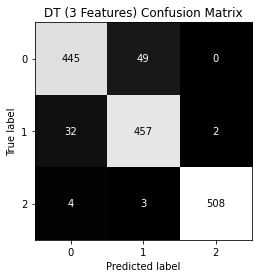

In [46]:
evaluate_model(grid_search, X_important_test, y_important_test, total_time, 'DT (3 Features)') # Output model evaluation and metrics

## 4. kNN

#### a) Train using reduced dataset of 49 features

In [47]:
from sklearn import neighbors
from sklearn.pipeline import Pipeline

# Hyperparameter optimization and training 
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', neighbors.KNeighborsClassifier())
])

param_grid = {'knn__n_neighbors': np.arange(30)+1,
              'knn__weights': ['uniform','distance']
             }

grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, verbose=3)
tstart = time.time() 
grid_search.fit(X_reduced_train, y_reduced_train)
total_time = time.time() - tstart

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.938) total time=   0.1s
[CV 2/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.942) total time=   0.1s
[CV 3/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.933) total time=   0.1s
[CV 4/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.932) total time=   0.1s
[CV 5/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.926) total time=   0.1s
[CV 1/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, test=0.938) total time=   0.1s
[CV 2/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, test=0.942) total time=   0.1s
[CV 3/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, test=0.933) total time=   0.1s
[CV 4/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, te

Best parameters: {'knn__n_neighbors': 4, 'knn__weights': 'distance'}
Best model: Pipeline(steps=[('sc', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=4, weights='distance'))])
Test score: 0.95
Total training time: 149 seconds.

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       494
           1       0.92      0.94      0.93       491
           2       0.99      0.99      0.99       515

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500



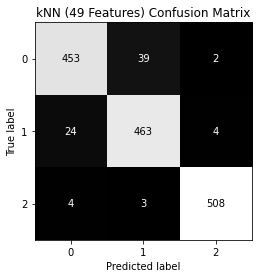

In [48]:
evaluate_model(grid_search, X_reduced_test, y_reduced_test, total_time, 'kNN (49 Features)')

#### b) Train using the 3 most important features

In [49]:
# Hyperparameter optimization and training
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', neighbors.KNeighborsClassifier())
])

param_grid = {'knn__n_neighbors': np.arange(30)+1,
              'knn__weights': ['uniform','distance']
             }

grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, verbose=3)
tstart = time.time() 
grid_search.fit(X_important_train, y_important_train)
total_time = time.time() - tstart

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.849) total time=   0.0s
[CV 2/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.849) total time=   0.0s
[CV 3/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.860) total time=   0.0s
[CV 4/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.864) total time=   0.0s
[CV 5/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.806) total time=   0.0s
[CV 1/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, test=0.849) total time=   0.0s
[CV 2/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, test=0.849) total time=   0.0s
[CV 3/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, test=0.860) total time=   0.0s
[CV 4/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, te

Best parameters: {'knn__n_neighbors': 22, 'knn__weights': 'distance'}
Best model: Pipeline(steps=[('sc', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=22, weights='distance'))])
Test score: 0.87
Total training time: 32 seconds.

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       494
           1       0.78      0.85      0.81       491
           2       1.00      0.98      0.99       515

    accuracy                           0.87      1500
   macro avg       0.87      0.86      0.86      1500
weighted avg       0.87      0.87      0.87      1500



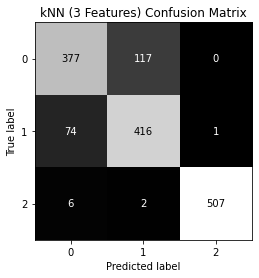

In [50]:
evaluate_model(grid_search, X_important_test, y_important_test, total_time, 'kNN (3 Features)')

## 5. SVM

#### a) Training on reduced dataset of 49 features

In [51]:
from sklearn.svm import SVC

# Hyperparamter optimization and training
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('svc', SVC(kernel='rbf'))
])

param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100],
              'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'svc__kernel': ['linear', 'rbf']
             }

grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, verbose=3)
tstart = time.time() 
grid_search.fit(X_reduced_train, y_reduced_train)
total_time = time.time() - tstart

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=linear;, score=(train=0.939, test=0.933) total time=   0.3s
[CV 2/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=linear;, score=(train=0.939, test=0.930) total time=   0.3s
[CV 3/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=linear;, score=(train=0.935, test=0.950) total time=   0.3s
[CV 4/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=linear;, score=(train=0.938, test=0.938) total time=   0.3s
[CV 5/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=linear;, score=(train=0.943, test=0.926) total time=   0.3s
[CV 1/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=rbf;, score=(train=0.674, test=0.664) total time=   2.0s
[CV 2/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=rbf;, score=(train=0.683, test=0.672) total time=   2.0s
[CV 3/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=rbf;, score=(train=0.677, test=0.684) total time=   2.0s
[CV 4/5] END svc__C

Best parameters: {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best model: Pipeline(steps=[('sc', StandardScaler()), ('svc', SVC(C=10, gamma=0.01))])
Test score: 0.97
Total training time: 1052 seconds.

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       494
           1       0.94      0.97      0.95       491
           2       1.00      0.99      1.00       515

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



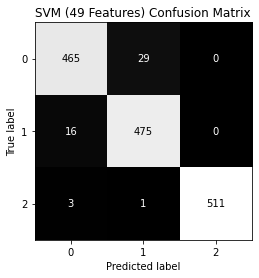

In [52]:
evaluate_model(grid_search, X_reduced_test, y_reduced_test, total_time, 'SVM (49 Features)')

#### b) Training using the 3 most important features

In [53]:
# Hyperparamter optimization and training
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('svc', SVC(kernel='rbf'))
])

param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100],
              'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'svc__kernel': ['linear', 'rbf']
             }

grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, verbose=3)
tstart = time.time() 
grid_search.fit(X_important_train, y_important_train)
total_time = time.time() - tstart

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=linear;, score=(train=0.783, test=0.783) total time=   0.3s
[CV 2/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=linear;, score=(train=0.780, test=0.799) total time=   0.3s
[CV 3/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=linear;, score=(train=0.782, test=0.786) total time=   0.3s
[CV 4/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=linear;, score=(train=0.786, test=0.769) total time=   0.3s
[CV 5/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=linear;, score=(train=0.785, test=0.776) total time=   0.3s
[CV 1/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=rbf;, score=(train=0.336, test=0.334) total time=   1.1s
[CV 2/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=rbf;, score=(train=0.335, test=0.336) total time=   1.1s
[CV 3/5] END svc__C=0.01, svc__gamma=0.001, svc__kernel=rbf;, score=(train=0.335, test=0.336) total time=   1.1s
[CV 4/5] END svc__C

Best parameters: {'svc__C': 10, 'svc__gamma': 10, 'svc__kernel': 'rbf'}
Best model: Pipeline(steps=[('sc', StandardScaler()), ('svc', SVC(C=10, gamma=10))])
Test score: 0.87
Total training time: 293 seconds.

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       494
           1       0.77      0.87      0.82       491
           2       1.00      0.98      0.99       515

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.87      0.87      0.87      1500



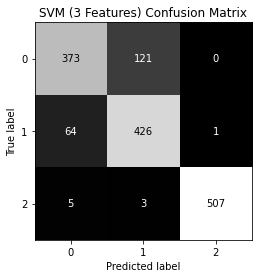

In [55]:
evaluate_model(grid_search, X_important_test, y_important_test, total_time, 'SVM (3 Features)')

## 6. Random Forest

#### a) Training on reduced dataset of 49 features

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter optimization and training
param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800]}
 
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True, verbose=3)
tstart = time.time()
grid_search.fit(X_reduced_train, y_reduced_train)
total_time = time.time() - tstart

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END n_estimators=100;, score=(train=1.000, test=0.966) total time=   1.4s
[CV 2/5] END n_estimators=100;, score=(train=1.000, test=0.960) total time=   1.4s
[CV 3/5] END n_estimators=100;, score=(train=1.000, test=0.961) total time=   1.4s
[CV 4/5] END n_estimators=100;, score=(train=1.000, test=0.963) total time=   1.4s
[CV 5/5] END n_estimators=100;, score=(train=1.000, test=0.951) total time=   1.4s
[CV 1/5] END n_estimators=200;, score=(train=1.000, test=0.968) total time=   2.7s
[CV 2/5] END n_estimators=200;, score=(train=1.000, test=0.961) total time=   2.7s
[CV 3/5] END n_estimators=200;, score=(train=1.000, test=0.961) total time=   2.8s
[CV 4/5] END n_estimators=200;, score=(train=1.000, test=0.963) total time=   2.7s
[CV 5/5] END n_estimators=200;, score=(train=1.000, test=0.952) total time=   2.7s
[CV 1/5] END n_estimators=300;, score=(train=1.000, test=0.966) total time=   4.1s
[CV 2/5] END n_estimators=3

Best parameters: {'n_estimators': 600}
Best model: RandomForestClassifier(n_estimators=600)
Test score: 0.97
Total training time: 264 seconds.

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       494
           1       0.95      0.97      0.96       491
           2       1.00      0.99      1.00       515

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



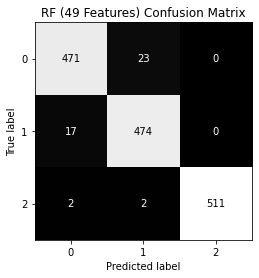

In [62]:
evaluate_model(grid_search, X_reduced_test, y_reduced_test, total_time, 'RF (49 Features)')

#### b) Train using the 3 most important features

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter optimization and training
param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, 
                           return_train_score=True, verbose=3)

grid_search.fit(X_important_train, y_important_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END n_estimators=100;, score=(train=1.000, test=0.947) total time=   0.4s
[CV 2/5] END n_estimators=100;, score=(train=1.000, test=0.950) total time=   0.4s
[CV 3/5] END n_estimators=100;, score=(train=1.000, test=0.954) total time=   0.4s
[CV 4/5] END n_estimators=100;, score=(train=1.000, test=0.941) total time=   0.4s
[CV 5/5] END n_estimators=100;, score=(train=1.000, test=0.926) total time=   0.4s
[CV 1/5] END n_estimators=200;, score=(train=1.000, test=0.948) total time=   0.8s
[CV 2/5] END n_estimators=200;, score=(train=1.000, test=0.951) total time=   0.8s
[CV 3/5] END n_estimators=200;, score=(train=1.000, test=0.958) total time=   0.8s
[CV 4/5] END n_estimators=200;, score=(train=1.000, test=0.939) total time=   0.8s
[CV 5/5] END n_estimators=200;, score=(train=1.000, test=0.924) total time=   0.8s
[CV 1/5] END n_estimators=300;, score=(train=1.000, test=0.949) total time=   1.2s
[CV 2/5] END n_estimators=3

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800]},
             return_train_score=True, verbose=3)

Best parameters: {'n_estimators': 300}
Best model: RandomForestClassifier(n_estimators=300)
Test score: 0.94
Total training time: 264 seconds.

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       494
           1       0.90      0.95      0.92       491
           2       1.00      0.99      0.99       515

    accuracy                           0.94      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.95      0.94      0.94      1500



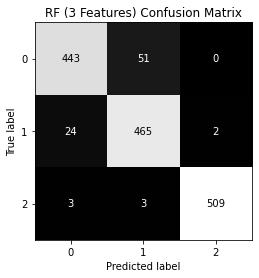

In [68]:
evaluate_model(grid_search, X_important_test, y_important_test, total_time, 'RF (3 Features)')